In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.offline as plty
from plotly import tools
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

import json
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)
sns.set_style("whitegrid")
sns.set_context("paper")

from datetime import datetime

### Предобработка данных

In [52]:
df_train = pd.read_parquet("train.parquet")
df_test = pd.read_parquet("test.parquet")
df_test['totals_transactionRevenue'] = np.nan

print(f"Shape of train dataframe : {df_train.shape}")
print(f"Shape of test dataframe : {df_test.shape}")

Shape of train dataframe : (633210, 35)
Shape of test dataframe : (164212, 35)


In [53]:
pd.options.display.max_columns = 100
df_train.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_continent,geoNetwork_subContinent,geoNetwork_country,geoNetwork_region,geoNetwork_metro,geoNetwork_city,geoNetwork_networkDomain,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adContent
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,ttnet.com.tr,1,1,1,1,NaN,(not set),google,organic,(not provided),None,None,None,None,None,None,None,None
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,1,1,NaN,(not set),google,organic,(not provided),None,None,None,None,None,None,None,None
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,unknown.unknown,1,1,1,1,NaN,(not set),google,organic,(not provided),None,None,None,None,None,None,None,None


In [54]:
from utils_EDA import DataDesc

In [55]:
DataDesc(df_train)

Dataset Shape: (633210, 35)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,channelGrouping,object,0,8,Organic Search,Organic Search,Organic Search
1,date,int64,0,243,20160902,20160902,20160902
2,fullVisitorId,object,0,507401,1131660440785968503,377306020877927890,3895546263509774583
3,sessionId,object,0,632648,1131660440785968503_1472830385,377306020877927890_1472880147,3895546263509774583_1472865386
4,visitId,int64,0,620692,1472830385,1472880147,1472865386
5,visitNumber,int64,0,353,1,1,1
6,visitStartTime,int64,0,621226,1472830385,1472880147,1472865386
7,device_browser,object,0,48,Chrome,Firefox,Chrome
8,device_operatingSystem,object,0,20,Windows,Macintosh,Windows
9,device_isMobile,bool,0,2,False,False,False


1. Очень много нулевых значений в колонке таргета 625758 из 633210
2. Многие колонки имеют ровно одно уникальное значение

Заполним наны

In [56]:
from utils_EDA import fill_na

In [57]:
df_train = fill_na(df_train)
df_test = fill_na(df_test)

${Заметка.}$ На этом моменте чуть не ошибся и не удалил колонки с 1 уникальным значением, оказалось, что там наны и False/True.

In [58]:
from utils_EDA import Null_Count

In [59]:
Null_Count(df_train)

,Column,Null_Count,Null_Percent
0,trafficSource_adContent,627939,99.167575
1,trafficSource_adwordsClickInfo.adNetworkType,619688,97.864532
2,trafficSource_adwordsClickInfo.slot,619688,97.864532
3,trafficSource_adwordsClickInfo.page,619688,97.864532
4,trafficSource_adwordsClickInfo.gclId,619639,97.856793
5,trafficSource_keyword,378553,59.783168
6,trafficSource_referralPath,364843,57.618010


Уберем колонки с нулевыми значениями, как видно из таблицы выше для выделенных фич их больше половины

In [60]:
df_train.drop(list(Null_Count(df_train)['Column']), axis=1,inplace=True)
df_test.drop(list(Null_Count(df_test)['Column']), axis=1,inplace=True)

Извлечем дополнительные фичи из даты

In [61]:
from utils_EDA import date_process

In [62]:
df_train = date_process(df_train)
df_test = date_process(df_test)

### Проанализируем распределение выручки

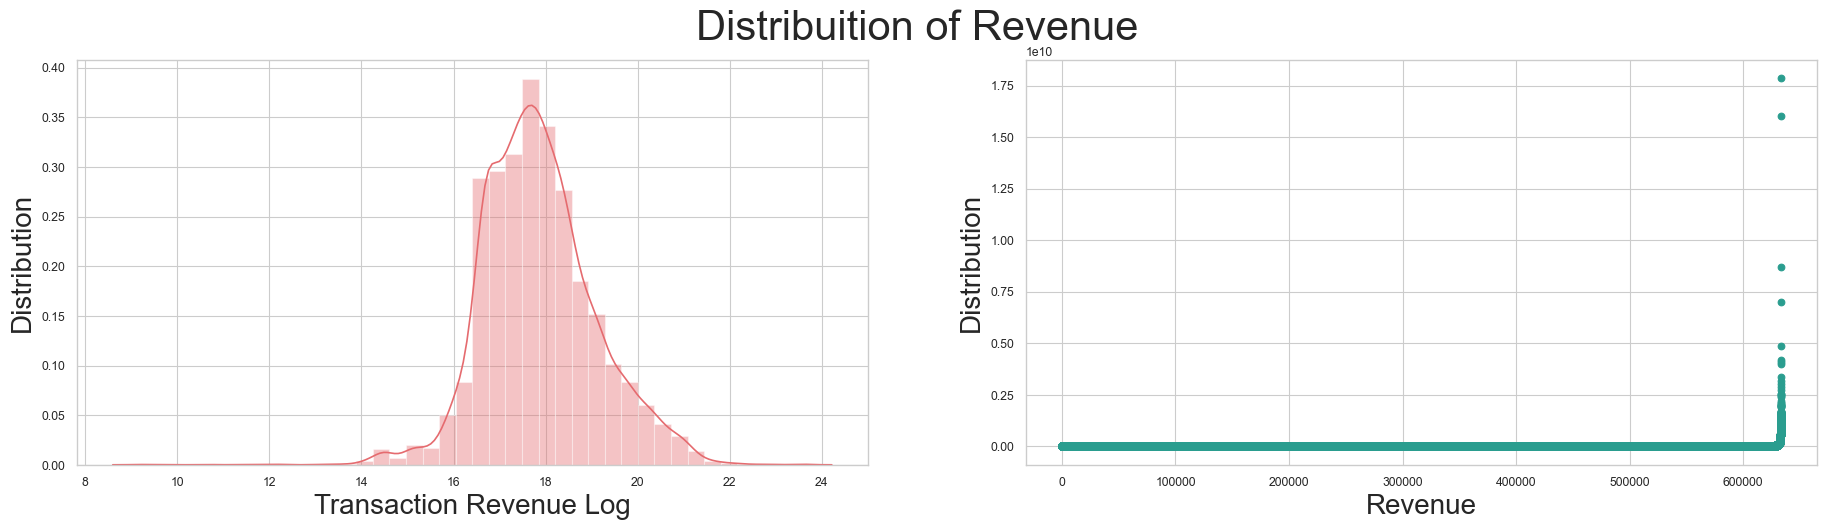

In [63]:
fig = plt.figure(figsize=(20,5))
plt.suptitle('Distribuition of Revenue', fontsize=30)

ax1 = fig.add_subplot(121)
_ = sns.distplot(np.log(df_train[df_train['totals_transactionRevenue'] > 0]["totals_transactionRevenue"]), bins=40,color='#e56b6f', ax=ax1)
_ = ax1.set_ylabel('Distribution', fontsize=20)
_ = ax1.set_xlabel('Transaction Revenue Log', fontsize=20)


ax2 = fig.add_subplot(122)
_ = plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals_transactionRevenue'].values), color='#2a9d8f')
_ = ax2.set_ylabel('Distribution', fontsize=20)
_ = ax2.set_xlabel('Revenue', fontsize=20)

Как видим только маленький процент пользователей приносит выручку

### Выручка по браузеру, девайсу и ОС

In [64]:
df_train['device_browser'].value_counts()[:10].reset_index()


def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Браузер
cnt_srs = df_train.groupby('device_browser')['totals_transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), '#073b4c')
trace2 = horizontal_bar_chart(cnt_srs["total revenue"].head(10), '#073b4c')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), '#073b4c')

# Категория девайса
cnt_srs = df_train.groupby('device_deviceCategory')['totals_transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace4 = horizontal_bar_chart(cnt_srs["count"].head(10), '#118ab2')
trace5 = horizontal_bar_chart(cnt_srs["total revenue"].head(10), '#118ab2')
trace6 = horizontal_bar_chart(cnt_srs["mean"].head(10), '#118ab2')

# ОС
cnt_srs = df_train.groupby('device_operatingSystem')['totals_transactionRevenue'].agg(['size', 'sum', 'mean'])
cnt_srs.columns = ["count", "total revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace7 = horizontal_bar_chart(cnt_srs["count"].head(10), '#ef476f')
trace8 = horizontal_bar_chart(cnt_srs["total revenue"].head(10),'#ef476f')
trace9 = horizontal_bar_chart(cnt_srs["mean"].head(10),'#ef476f')

fig = tools.make_subplots(rows=3, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Device Browser - Count", "Device Browser - Total Revenue", "Device Browser - Mean Revenue",
                                          "Device Category - Count",  "Device Category - Total Revenue ", "Device Category - Mean Revenue", 
                                          "Device OS - Count", "Device OS - Total Revenue", "Device OS - Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)

fig['layout'].update(height=1200, width=1500, template='plotly_white',paper_bgcolor='#ffffff', title="Device Plots")
plty.iplot(fig, filename='device-plots')

Выводы:
1. Основные покупки в гугл стор делаются с компьютера
2. В среднем пользователи с хром ОС приносят сильно больше других юзеров
3. Кто-то пользуется Firefox

### Анализ трафика

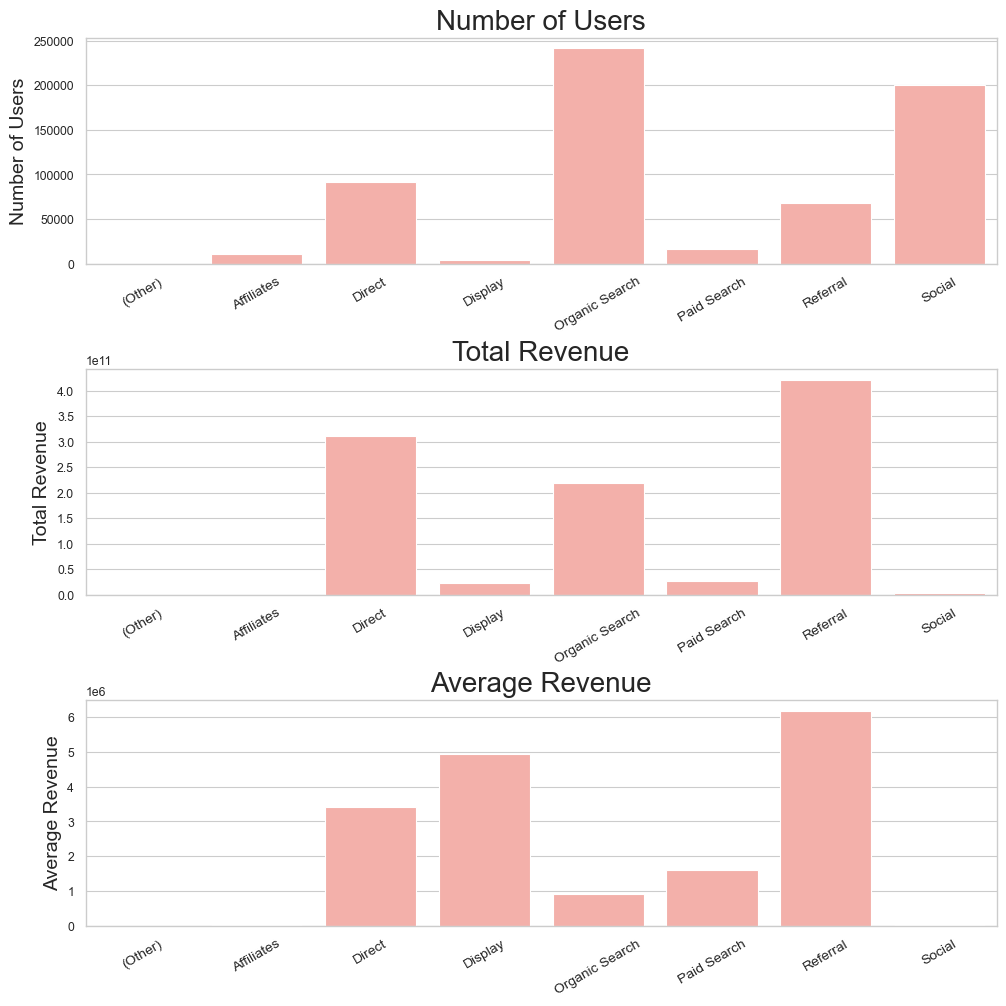

In [65]:
group = df_train.groupby('channelGrouping')['totals_transactionRevenue'].agg(['count','sum','mean']).reset_index()

color = ["#ffa69e","#faf3dd","#b8f2e6","#aed9e0","#5e6472",'#f6bd60','#84a59d','#f8edeb']
customPalette = sns.set_palette(sns.color_palette(color))

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
_ = sns.barplot(data=group, x='channelGrouping', y='count', palette= customPalette, ax=ax1)
xlabels = group['channelGrouping'].to_list()
ylabels = group['count']
_ = ax1.set_title('Number of Users', fontsize=20)
_ = ax1.set_ylabel('Number of Users', fontsize=14)
_ = ax1.set_xlabel('')
_ = ax1.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax2 = fig.add_subplot(312)
_ = sns.barplot(data=group, x='channelGrouping', y='sum', palette= customPalette, ax=ax2)
xlabels = group['channelGrouping'].to_list()
ylabels = group['sum']
_ = ax2.set_title('Total Revenue', fontsize=20)
_ = ax2.set_ylabel('Total Revenue', fontsize=14)
_ = ax2.set_xlabel('')
_ = ax2.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax3 = fig.add_subplot(313)
_ = sns.barplot(data=group, x='channelGrouping', y='mean', palette= customPalette, ax=ax3)
xlabels = group['channelGrouping'].to_list()
ylabels = group['mean']
_ = ax3.set_title('Average Revenue', fontsize=20)
_ = ax3.set_ylabel('Average Revenue', fontsize=14)
_ = ax3.set_xlabel('')
_ = ax3.set_xticklabels(xlabels, rotation=30, fontsize=10)

fig.tight_layout(pad=0.5)

Выводы:
Рефералки явялются самым эффективным инструментом

In [66]:
group = df_train.groupby(['channelGrouping','device_browser']).size().rename('Count').reset_index()

group_sorted = group.groupby(['channelGrouping']).apply(lambda x: x.sort_values(['Count'], ascending=False)).reset_index(drop=True)

group_top_four = group_sorted.groupby(['channelGrouping']).head(4)

colors = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51",'#457b9d']
px.bar(data_frame=group_top_four,x='channelGrouping',y='Count', color='device_browser', template='plotly_white', color_discrete_sequence= colors)

### Распределение выручки в зависимости от ОС

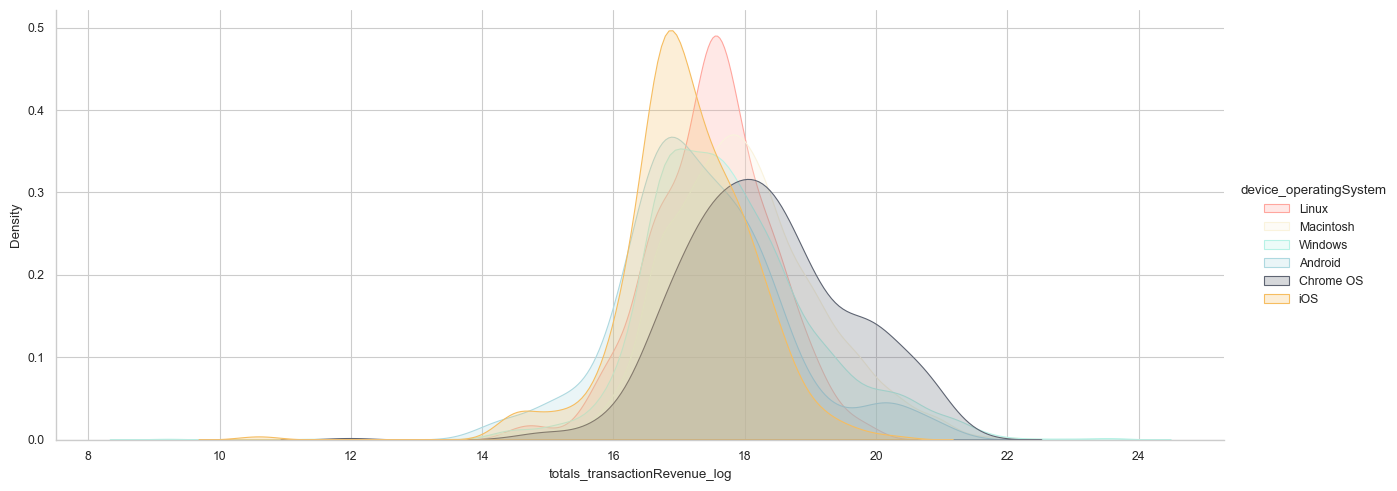

In [67]:
# Нормализуем выручку
df_train['totals_transactionRevenue_log'] = df_train['totals_transactionRevenue'].apply(lambda x: np.log1p(x))

group = df_train[
    (df_train['device_operatingSystem'].isin(
        df_train[df_train['totals_transactionRevenue_log'] > 0]['device_operatingSystem'].value_counts().head(6).index
    ))
    & (df_train['totals_transactionRevenue_log'] > 0)
]

_ = sns.FacetGrid(group,
               hue='device_operatingSystem', height=5, aspect=2.5)\
  .map(sns.kdeplot, 'totals_transactionRevenue_log', shade=True)\
 .add_legend()

### Проанализируем распределение выручеи в зависимости от девайса

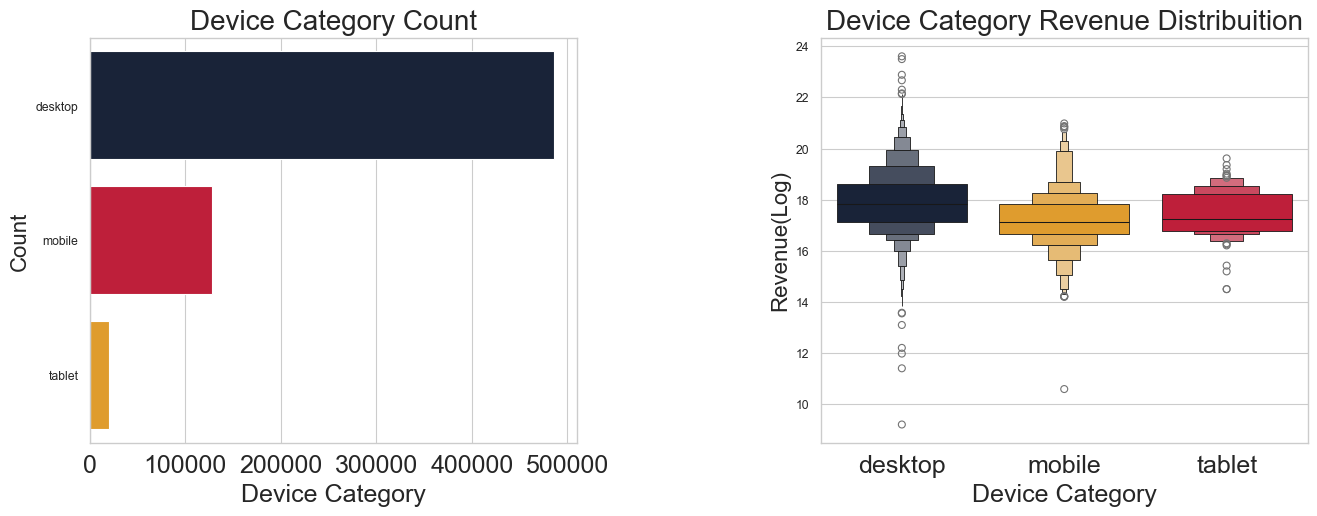

In [68]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(df_train["device_deviceCategory"], palette= ['#14213d','#d90429','#fca311']) 
plt.title("Device Category Count", fontsize=20) 
plt.xlabel("Device Category", fontsize=18) 
plt.ylabel("Count", fontsize=16) 
plt.xticks(fontsize=18) 

plt.subplot(1,2,2)
sns.boxenplot(x="device_deviceCategory", y = 'totals_transactionRevenue_log', 
              data=df_train[df_train['totals_transactionRevenue_log'] > 0], palette=['#14213d','#fca311','#d90429']) 
plt.title("Device Category Revenue Distribuition", fontsize=20) 
plt.xlabel("Device Category", fontsize=18) 
plt.ylabel("Revenue(Log)", fontsize=16) 
plt.xticks(fontsize=18)

plt.subplots_adjust(hspace = 0.9, wspace = 0.5)

plt.show()

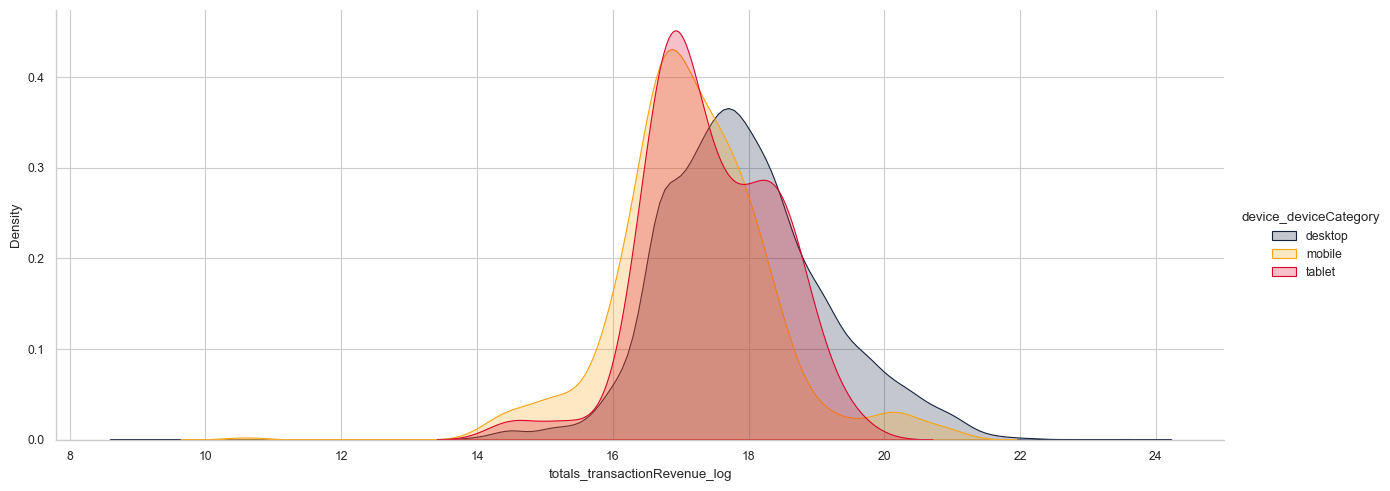

In [69]:
color = ['#14213d','#fca311','#d90429']

customPalette = sns.set_palette(sns.color_palette(color))

_ = sns.FacetGrid(df_train[df_train['totals_transactionRevenue_log'] > 0],
               hue='device_deviceCategory', height=5, aspect=2.5, palette=customPalette)\
  .map(sns.kdeplot, 'totals_transactionRevenue_log', shade=True)\
 .add_legend()

### Проанализируем связь выручки с временем покупки

In [70]:
pd.crosstab(df_train['visitHour'],
            df_train['weekday'], 
            values=df_train['totals_transactionRevenue_log'], 
            aggfunc='sum').style.background_gradient(cmap='viridis')

weekday,0,1,2,3,4,5,6
visitHour,,,,,,,
0,1489.287482,1790.606975,1623.796978,1754.571991,1683.065187,618.752441,585.462596
1,1603.331667,1433.704574,1455.506797,1414.490417,2145.259763,489.556570,703.982779
2,1317.178775,1131.786199,1098.425337,1159.804150,1295.068944,555.863780,650.729329
3,1244.872868,1252.553308,1150.261033,1028.177070,935.867269,539.022507,973.495647
4,983.497536,895.652692,1035.028000,1053.445813,639.826652,453.045160,855.937004
5,941.459226,1132.188313,995.955693,904.218830,712.863327,370.210466,880.073387
6,1075.908944,669.228644,853.262227,623.261325,635.305005,455.623502,407.228412
7,975.835199,833.451631,758.181479,514.895723,465.801793,422.450215,801.850694
8,621.259379,566.104005,457.734194,480.397338,385.702453,345.749393,458.619532


Как видно из этого кростаба наиболее активное время - вечер/ночь. Скорее удивляет, что наиболее активным днем является понедельник, но это может быть связано с временем работы банков или обслуживания платежей в США (???)

### Проанализируем связь выручки с локацией

In [71]:
from utils_EDA import PieChart

In [72]:
PieChart(df_train, "geoNetwork_city", "Top Cities by Accesses and Revenue", limit=10)

На Нью-Йорк приходится почти половина выручки. Если еще включит санфран и сан-хосе, то получим, что США с отрывом опережают другие страны, поэтому чтобы нормально изобразить countmaps затмим США.

In [73]:
countMaps = df_train.groupby('geoNetwork_country')['totals_transactionRevenue_log'].sum().reset_index()
countMaps.columns=['country', 'revenue']
countMaps = countMaps.reset_index().drop('index', axis=1) 

data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['revenue'],
        text = countMaps['country'],
        colorscale = 'Jet',
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Revenue'),
      ) ]

layout = dict(
    title = 'Total Revenue Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')

In [74]:
df_train.drop(columns='totals_transactionRevenue_log', inplace=True)

### Создадим новые фичи

In [75]:
df_train['totals_hits'] = df_train['totals_hits'].astype(int)
df_test['totals_hits'] = df_test['totals_hits'].astype(int)

In [76]:
# Нормализация посещенных страниц
def Normalizing(df):
    df["totals_hits"] =  (df['totals_hits'] - min(df['totals_hits'])) / (max(df['totals_hits'])  - min(df['totals_hits']))
    return df

In [77]:
df_train = Normalizing(df_train)
df_test = Normalizing(df_test)

Добавим некоторые агрегированные данные

In [78]:
from utils_EDA import add_aggregated_features

In [79]:
aggs = {
    'date': ['min', 'max'],
    'totals_hits': ['sum', 'min', 'max', 'mean', 'median'],
    'totals_pageviews': ['sum', 'min', 'max', 'mean', 'median'],
    'totals_bounces': ['sum', 'mean', 'median'],
    'totals_newVisits': ['sum', 'mean', 'median']
}

df_train = add_aggregated_features(df_train, aggs)
df_test = add_aggregated_features(df_test, aggs)

Original DataFrame shape: (633210, 33)
Aggregated DataFrame sample:                       date_min   date_max  totals_hits_sum  totals_hits_min  \
fullVisitorId                                                                 
0000010278554503158 2016-10-20 2016-10-20         0.020040         0.020040   
0000020424342248747 2016-11-30 2016-11-30         0.032064         0.032064   
0000027376579751715 2017-02-11 2017-02-11         0.010020         0.010020   
0000039460501403861 2017-03-27 2017-03-27         0.002004         0.002004   
0000040862739425590 2017-02-11 2017-02-11         0.006012         0.002004   

                     totals_hits_max  totals_hits_mean  totals_hits_median  \
fullVisitorId                                                                
0000010278554503158         0.020040          0.020040            0.020040   
0000020424342248747         0.032064          0.032064            0.032064   
0000027376579751715         0.010020          0.010020            

Произведем энкодинг категориальных фич

In [80]:
cat_features = []

for df in [df_train, df_test]:
    for col in df.columns:
        if col in ['fullVisitorId', 'sessionId']:
            continue
        if df[col].dtypes == object or df[col].dtypes == bool:
            df[col], indexer = pd.factorize(df[col])
            cat_features.append(col)

Случайно в цикле с датафреймами это сделал, очистим от дубликатов и запишем категориальные фичи в json файл

In [86]:
with open('cat_features.json', 'w') as file:
    json.dump(cat_features[:int(len(cat_features)/2)], file)

### Сохраняем данные

In [40]:
df_train.to_parquet("train_pr.parquet", index=False)
df_test.to_parquet("test_pr.parquet", index=False)